# Data Visualization Project "Prosper.com"
<ul>
<li><a href="#exploration">General Exploration</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#structuring">Strucured Exploration</a></li>
 <ul>
    <li><a href="#loan_details">Loan Details</a>
    <li><a href="#borrower_details">Borrower Details</a>
    <li><a href="#borrowers_history">Borrowers History</a>        
 </ul>
</ul>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
blue = sb.color_palette()[0]
pd.options.display.max_columns = None

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
df_loan = pd.read_csv('data/prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

<a id='intro'></a>
<img src="images/return_risk.png" width="400" height="400" align="right">
# Final Project "prosper.com"

**Prosper likes to promote the fact that every investor since 2009 (Prosper 2.0) that has invested in at least 100 loans has made a positive return.** (Source: https://www.lendacademy.com/prosper-review/)

The interpretation of the sentence is a bit tricky: Does it mean at least one loan got a positive return while the rest got lost or returned less than invested? Or is the total return adressed? What if we take the 100 worst loans, is there still a positive return? 

To get out of this ambiguity we take a simpler question. Instead of asking: What to do to maximize returns - we take a more defensive approach. What shall an investor do to avoid losses?  In time of zero interest rates provided by banks we consider an positive return already as achievement. 

- We want to know which type of loan is least likely to default. Since everything is changing constantly we need to investigate the distribution of loan types over time to get a feeling for trends and further evolution. 
- We also look at the geographic distribution of loans and their liklyhood to default. 
- The combination of default rates for loan category with the geographic default risk is our first rule of thumb as aspiring investors.

<a id='exploration'></a>
# General Exploration

In [5]:
df_loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
print('The dataset contains {} rows and {} columns'.format(df_loan.shape[0], df_loan.shape[1]))
df_loan.describe()

The dataset contains 113937 rows and 81 columns


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
print('The first listing is from:')
df_loan.sort_values('ListingCreationDate').head(1)
print('The last listing is from:')
df_loan.sort_values('ListingCreationDate').tail(1)

The first listing is from:


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113921,D21A33647075665665BE266,4,2005-11-09 20:44:28.847000000,AA,36,Completed,2005-11-25 00:00:00,NaN,0.04,0.035,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,B8143364846229046768A83,2005-11-09 20:44:28.847000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23284,Not displayed,True,12500.0,30FD3365652573455326F15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,1,1000,2005-11-15 00:00:00,Q4 2005,D3123364665672102D89C63,29.52,1000.89,1000.0,0.89,-0.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


The last listing is from:


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
14131,CB863604626731380F57A50,1255725,2014-03-10 12:20:53.760000000,NaN,36,Current,NaN,0.19386,0.157,0.147,0.13785,0.0649,0.07295,4.0,C,5.0,18,OH,Other,Self-employed,30.0,True,False,NaN,2014-03-10 12:20:56,660.0,679.0,1998-09-28 00:00:00,5.0,5.0,23.0,1,91.0,0.0,0.0,2.0,22.0,5.0,0.0,0.0,2945.0,0.98,55.0,20.0,0.76,0.0,NaN,"$25,000-49,999",False,3083.333333,A9E437088889409337134DA,1.0,33.0,33.0,0.0,0.0,2000.0,254.53,NaN,0,NaN,0,135830,4000,2014-03-12 00:00:00,Q1 2014,90383515102200430C9CF78,140.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [8]:
pd.set_option('display.max_rows', 81)
df_loan.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [9]:
listing_categories = [ 'Not Available',
 'Debt Consolidation',
 'Home Improvement',
 'Business',
 'Personal Loan',
 'Student Use',
 'Auto',
 'Other',
 'Baby&Adoption',
 'Boat',
 'Cosmetic Procedure',
 'Engagement Ring',
 'Green Loans',
 'Household Expenses',
 'Large Purchases',
 'Medical/Dental',
 'Motorcycle',
 'RV',
 'Taxes',
 'Vacation',
 'Wedding Loans']

listing_categories_without_debt = [ 
 'Home Improvement',
 'Business',
 'Personal Loan',
 'Student Use',
 'Auto',
 'Other',
 'Baby&Adoption',
 'Boat',
 'Cosmetic Procedure',
 'Engagement Ring',
 'Green Loans',
 'Household Expenses',
 'Large Purchases',
 'Medical/Dental',
 'Motorcycle',
 'RV',
 'Taxes',
 'Vacation',
 'Wedding Loans']

listing_categories_short = ['Debt',
 'Home',
 'Business',
 'Personal',
 'Student']
listing_categories_short

['Debt', 'Home', 'Business', 'Personal', 'Student']

In [10]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [11]:
loan_org_quarter_categories = ['2009 Q3', '2009 Q4', '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4',
       '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4', '2012 Q1', '2012 Q2',
       '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4',
       '2014 Q1']

<a id='cleaning'></a>
# Data Cleaning

## Actions:

    - Remove duplicated listings with different prosper scores: 871 duplicates were removed.
    - Remove all data before July 2009: 28 953 data rows were removed (25.6%)
    - Filter out all data without prosper rating: 131 data points filtered out
    - Filter for completed / defaulted loans: 57990 out of 83982 data were filtered out (69%)

    - Set categorical types
    - Set additional outcome categories
    - Make LoanOriginationQuarter orderable

## Observations:

    - Why were so much data (69%) filtered out? Start is July 2009, latest listing creation date is from 2014. Since loans are running up to 4 years 69% ongoing loans were filtered out.
    - An analysis based on only 25.992 loans with an outcome is not overwhelming, newer prosper data after 2014 should be used for further investigations.

In [12]:
df_loan_clean = df_loan.copy()

### Remove duplicated listings with different prosper scores
871 duplicates were removed.

In [13]:
# Remove duplicated listings with different prosper scores
df_loan_clean = df_loan_clean.drop_duplicates(subset=df_loan_clean.columns.difference(['ProsperScore']))
df_loan_clean.shape[0], df_loan.shape[0]

(113066, 113937)

### Make LoanOriginationQuarter orderable

In [14]:
df_loan_clean['LoanOriginationQuarterNew'] = df_loan_clean['LoanOriginationQuarter'].str.split().str[1] + ' ' + df_loan_clean['LoanOriginationQuarter'].str.split().str[0] 

df_loan_clean = df_loan_clean.sort_values(['ListingCreationDate'])
df_loan_clean['LoanOriginationQuarterNew'].unique()
# even after sorting by LoanOriginationQuarterNew we do not achieve a real sorting
# thats why we are setting LoanOriginationQuarterNew as categorical data type


loan_org_quarter_classes = pd.api.types.CategoricalDtype(ordered=True, categories=loan_org_quarter_categories)
df_loan_clean['LoanOriginationQuarterNew']=df_loan_clean['LoanOriginationQuarterNew'].astype(loan_org_quarter_classes)

array(['2005 Q4', '2006 Q1', '2006 Q2', '2006 Q3', '2006 Q4', '2007 Q1',
       '2007 Q2', '2008 Q2', '2009 Q4', '2007 Q3', '2007 Q4', '2008 Q1',
       '2010 Q1', '2008 Q4', '2009 Q3', '2008 Q3', '2010 Q2', '2010 Q4',
       '2010 Q3', '2009 Q2', '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4',
       '2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2',
       '2013 Q3', '2013 Q4', '2014 Q1'], dtype=object)

### Set categorical types

In [15]:
def set_prosper_rating_categorical(df_data, prosper_rating_categories, column):
    prosper_rating_classes = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_rating_categories)
    df_data[column]=df_data[column].astype(prosper_rating_classes).copy()    
    return df_data

### Separate data before and after July 2009
28 953 data points before July 2009 were removed (25.6%)

In [16]:
df_loan_clean['LoanOriginationDate']= pd.to_datetime(df_loan_clean['LoanOriginationDate'])  
df_loan_clean['ListingCreationDate']= pd.to_datetime(df_loan_clean['ListingCreationDate']) 

df_loan_clean['ListingCreationDate'].dtype

df_loan_clean.sort_values(['LoanOriginationDate']).head(1)
df_loan_clean.sort_values(['LoanOriginationDate']).tail(1)

dtype('<M8[ns]')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationQuarterNew
113921,D21A33647075665665BE266,4,2005-11-09 20:44:28.847,AA,36,Completed,2005-11-25 00:00:00,NaN,0.04,0.035,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,B8143364846229046768A83,2005-11-09 20:44:28.847000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23284,Not displayed,True,12500.0,30FD3365652573455326F15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,1,1000,2005-11-15,Q4 2005,D3123364665672102D89C63,29.52,1000.89,1000.0,0.89,-0.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationQuarterNew
14131,CB863604626731380F57A50,1255725,2014-03-10 12:20:53.760,NaN,36,Current,NaN,0.19386,0.157,0.147,0.13785,0.0649,0.07295,4.0,C,5.0,18,OH,Other,Self-employed,30.0,True,False,NaN,2014-03-10 12:20:56,660.0,679.0,1998-09-28 00:00:00,5.0,5.0,23.0,1,91.0,0.0,0.0,2.0,22.0,5.0,0.0,0.0,2945.0,0.98,55.0,20.0,0.76,0.0,NaN,"$25,000-49,999",False,3083.333333,A9E437088889409337134DA,1.0,33.0,33.0,0.0,0.0,2000.0,254.53,NaN,0,NaN,0,135830,4000,2014-03-12,Q1 2014,90383515102200430C9CF78,140.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014 Q1


In [17]:
df_loan.shape
df_loan_clean.shape
df_loan_2006 = df_loan_clean[df_loan_clean['LoanOriginationDate'] <= '2009-07-01']
df_loan_2006.shape
df_loan_2009 = df_loan_clean[df_loan_clean['LoanOriginationDate'] > '2009-07-01']
df_loan_2009.shape

(113937, 81)

(113066, 82)

(28953, 82)

(84113, 82)

In [18]:
df_loan_without_debt = df_loan_clean[df_loan_clean['ListingCategory (numeric)'] >1]
df_loan_without_debt_2006 = df_loan_without_debt[df_loan_without_debt['LoanOriginationDate'] <= '2009-07-01']
df_loan_without_debt_2009 = df_loan_without_debt[df_loan_without_debt['LoanOriginationDate'] > '2009-07-01']

In [19]:
df_loan_2009.shape[0]
df_loan_2009 = df_loan_2009[df_loan_2009['ProsperRating (Alpha)'].notnull()].copy()
df_loan_2009.shape[0]

df_loan_2009.ProsperScore.dtype
df_loan_2009.ProsperScore = df_loan_2009.ProsperScore.astype(int)
df_loan_2009.ProsperScore.dtype

84113

83982

dtype('float64')

dtype('int32')

In [20]:
df_loan_2009 = set_prosper_rating_categorical(df_loan_2009,
                               ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                               'ProsperRating (Alpha)')

df_loan_2009 = set_prosper_rating_categorical(df_loan_2009,
                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                               'ProsperScore')

### Filter for completed / defaulted loans
57990 out of 83982 data points were filtered out (69%)

In [21]:
df_loan_clean['LoanStatus'].unique()

df_loan_clean.shape[0]
df_loan_with_outcome = df_loan_clean[df_loan_clean['LoanStatus'].isin(['Defaulted', 'Completed', 'Chargedoff'])].copy()
df_loan_clean.shape[0] - df_loan_with_outcome.shape[0]

array(['Completed', 'Defaulted', 'Chargedoff', 'Cancelled', 'Current',
       'Past Due (1-15 days)', 'Past Due (91-120 days)',
       'Past Due (61-90 days)', 'FinalPaymentInProgress',
       'Past Due (31-60 days)', 'Past Due (16-30 days)',
       'Past Due (>120 days)'], dtype=object)

113066

57995

### Set additional outcome categories

In [22]:
df_loan_with_outcome['Loan Outcome'] = df_loan_with_outcome['LoanStatus'].apply(lambda x: 'Defaulted' if (x == 'Defaulted' or x == 'Chargedoff') else 'Paid')
df_loan_with_outcome['Loan Outcome'] 

df_delayed = df_loan_clean[df_loan_clean['LoanStatus'].isin(['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'Past Due (>120 days)'])]
df_delayed.shape[0]

df_current = df_loan_clean[df_loan_clean['LoanStatus'].isin(['Current'])]
df_current.shape[0]

113921    Paid
106735    Paid
25166     Paid
62297     Paid
90598     Paid
          ... 
25523     Paid
77253     Paid
45754     Paid
107601    Paid
41757     Paid
Name: Loan Outcome, Length: 55071, dtype: object

2057

55730

In [23]:
df_loan_with_outcome.to_csv('data/loan_with_outcome.csv')
df_loan_2006.to_csv('data/loan_2006.csv')
df_loan_2009.to_csv('data/loan_2009.csv')
df_loan_without_debt_2006.to_csv('data/loan_without_debt_2006.csv')
df_loan_without_debt_2009.to_csv('data/loan_without_debt_2009.csv')

<a id='structuring'></a>
# Structuring

## Grouping Data

Devide the data into meaningful groups for getting a better overview about the relations:

### Loan details 

    Considered information:
    - when was the borrowers application for a loan listed (listing),
    - when was the loan granted, 
    - what does the borrowers pay 
    - what does the lender get (LenderYield)
    - how did the loan terminated 
    - what is the usual amount of loan (LoanOrignalAmount)
    - how long are loans granted (Term)

    Not considered information: estimations about loss, return and yield
    

### Borrowers details

    Considered information:
    - what rating & score does the borrower have
    - what is the borrower by profession and how long is he employed
    - how credit worthy is the borrower
    
    
### Borrowers history
    - how many loans are borrowers holding as maximum
    - what tells the bank card utilization
    - revolving credit balance

<a id='loan_details'></a>
##  Loan Details

### Observations:

    - borrowers pay between 0 Dollar (?) and 2251 Dollar per month (0 Dollar needs to be investigated)
    - lender yields ranges between -1% and 49% (LenderYield)
    - loans terminated with default, chargedoff or paid status
    - loan amount ranges between 1.000 and 35.000 $ (LoanOrignalAmount)
    - loans are running between 12 and 60 months (Term)

### Possible questions:

    1. What has an impact on default risk: listing catgeory, amount, prosper score, term?
    2. How does defaults / LoanOriginalAmount / ListingCatgeory evolve over time?
    3. How does LoanStatus == Default / Chargedoff  compared to Completed (Filter out all Currents and Past Dues) = default risk evolve over time?
    4. How fast /greedy) are investors -> compare the listing time and the loan creation time ->what is the impact of loan amount, term, prosper score, ListingCategory?

In [24]:
#ListingCreationDate - Anzeige
#LoanCreationDate - Investor gefunden
# Term - Laufzeit
df_loan_details = df_loan[['ListingNumber', 'ListingCreationDate', 'LoanOriginationDate', 'LoanOriginationQuarter', 
                           'ListingCategory (numeric)', 'Term', 'ClosedDate',
                           'LoanStatus', 'LoanOriginalAmount',
                           'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
                           'LoanMonthsSinceOrigination', 
                           'MonthlyLoanPayment', 'BorrowerAPR', 'BorrowerRate',
                           'LenderYield', 
                           'LoanKey', 'ListingKey','LoanNumber']].copy()
#'EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn', 
df_loan_details.head(2)

,ListingNumber,ListingCreationDate,LoanOriginationDate,LoanOriginationQuarter,ListingCategory (numeric),Term,ClosedDate,LoanStatus,LoanOriginalAmount,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,LenderYield,LoanKey,ListingKey,LoanNumber
0,193129,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00,Q3 2007,0,36,2009-08-14 00:00:00,Completed,9425,0,NaN,78,330.43,0.16516,0.158,0.138,E33A3400205839220442E84,1021339766868145413AB3B,19141
1,1209647,2014-02-27 08:28:07.900000000,2014-03-03 00:00:00,Q1 2014,2,36,NaN,Current,10000,0,NaN,0,318.93,0.12016,0.092,0.082,9E3B37071505919926B1D82,10273602499503308B223C1,134815


In [25]:
print('Description of the loan details data set:')
df_loan_details.describe()

Description of the loan details data set:


,ListingNumber,ListingCategory (numeric),Term,LoanOriginalAmount,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,LenderYield,LoanNumber
count,1.139370e+05,113937.000000,113937.000000,113937.00000,113937.000000,16952.000000,113937.000000,113937.000000,113912.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,2.774209,40.830248,8337.01385,152.816539,16.268464,31.896882,272.475783,0.218828,0.192764,0.182701,69444.474271
std,3.280762e+05,3.996797,10.436212,6245.80058,466.320254,9.005898,29.974184,192.697812,0.080364,0.074818,0.074516,38930.479610
min,4.000000e+00,0.000000,12.000000,1000.00000,0.000000,0.000000,0.000000,0.000000,0.006530,0.000000,-0.010000,1.000000
25%,4.009190e+05,1.000000,36.000000,4000.00000,0.000000,9.000000,6.000000,131.620000,0.156290,0.134000,0.124200,37332.000000
50%,6.005540e+05,1.000000,36.000000,6500.00000,0.000000,14.000000,21.000000,217.740000,0.209760,0.184000,0.173000,68599.000000
75%,8.926340e+05,3.000000,36.000000,12000.00000,0.000000,22.000000,65.000000,371.580000,0.283810,0.250000,0.240000,101901.000000
max,1.255725e+06,20.000000,60.000000,35000.00000,2704.000000,44.000000,100.000000,2251.510000,0.512290,0.497500,0.492500,136486.000000


In [26]:
df_loan_details.dtypes

ListingNumber                      int64
ListingCreationDate               object
LoanOriginationDate               object
LoanOriginationQuarter            object
ListingCategory (numeric)          int64
Term                               int64
ClosedDate                        object
LoanStatus                        object
LoanOriginalAmount                 int64
LoanCurrentDaysDelinquent          int64
LoanFirstDefaultedCycleNumber    float64
LoanMonthsSinceOrigination         int64
MonthlyLoanPayment               float64
BorrowerAPR                      float64
BorrowerRate                     float64
LenderYield                      float64
LoanKey                           object
ListingKey                        object
LoanNumber                         int64
dtype: object

In [27]:
def plot_categories(df_data, xticklabels, title, logscale=False):
    plt.figure(figsize = [10, 5]);
    cp = sb.countplot(data=df_data, 
                      x='ListingCategory (numeric)', 
                      palette=sb.color_palette("Blues", 20));
    cp.set_xticklabels(xticklabels);
    if logscale:
        cp.set_yscale('log');
    plt.xticks(rotation=80);
    cp.set_ylabel('Number of Listings')
    cp.set_xlabel('Loan Category');
    cp.set_title(title, fontsize=15);

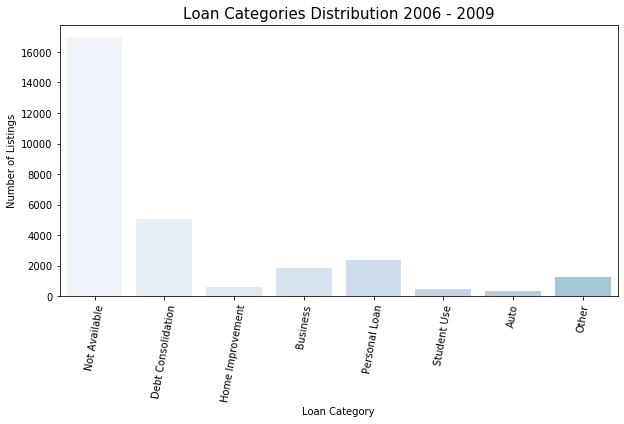

In [28]:
plot_categories(df_loan_2006, 
                   listing_categories, 
                   'Loan Categories Distribution 2006 - 2009')

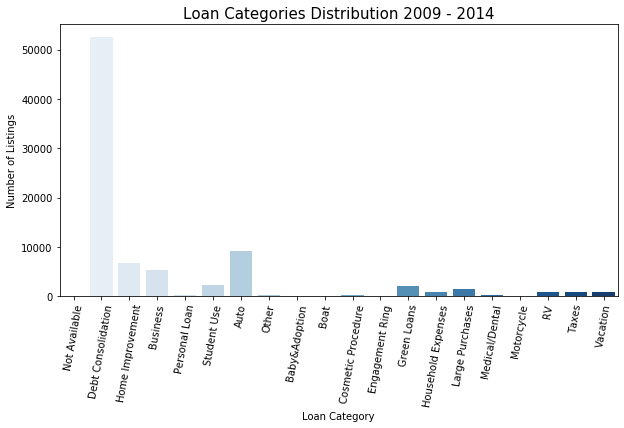

In [29]:
plot_categories(df_loan_2009, 
                   listing_categories, 
                   'Loan Categories Distribution 2009 - 2014')

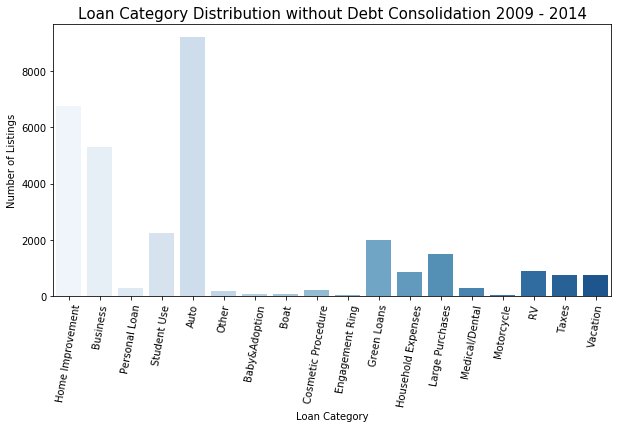

In [30]:
plot_categories(df_loan_without_debt_2009, 
                   listing_categories_without_debt, 
                   'Loan Category Distribution without Debt Consolidation 2009 - 2014')

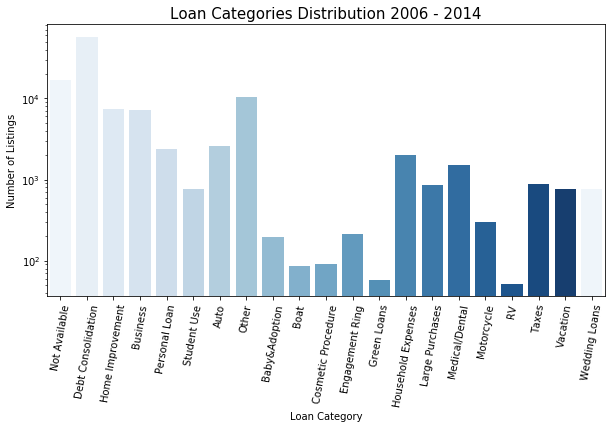

In [31]:
plot_categories(df_loan_clean, 
                   listing_categories, 
                   'Loan Categories Distribution 2006 - 2014',
                   True)

In [32]:
def plot_loan_catgeories_over_time(df_data, legend, xticklabels, title):
    cp = sb.countplot(data=df_data,
                      x="LoanOriginationQuarter", 
                      hue="ListingCategory (numeric)", 
                      color=blue
                      );
    cp.set_xlabel('Year / Quarter', fontsize=20);
    cp.set_ylabel('Number of Listings', fontsize=20);
    cp.set_xticklabels(xticklabels, fontsize=12);
    cp.legend(legend, bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0.1, fontsize=10);
    #legend = cp.get_legend();
    cp.set_title(title, fontsize=25);

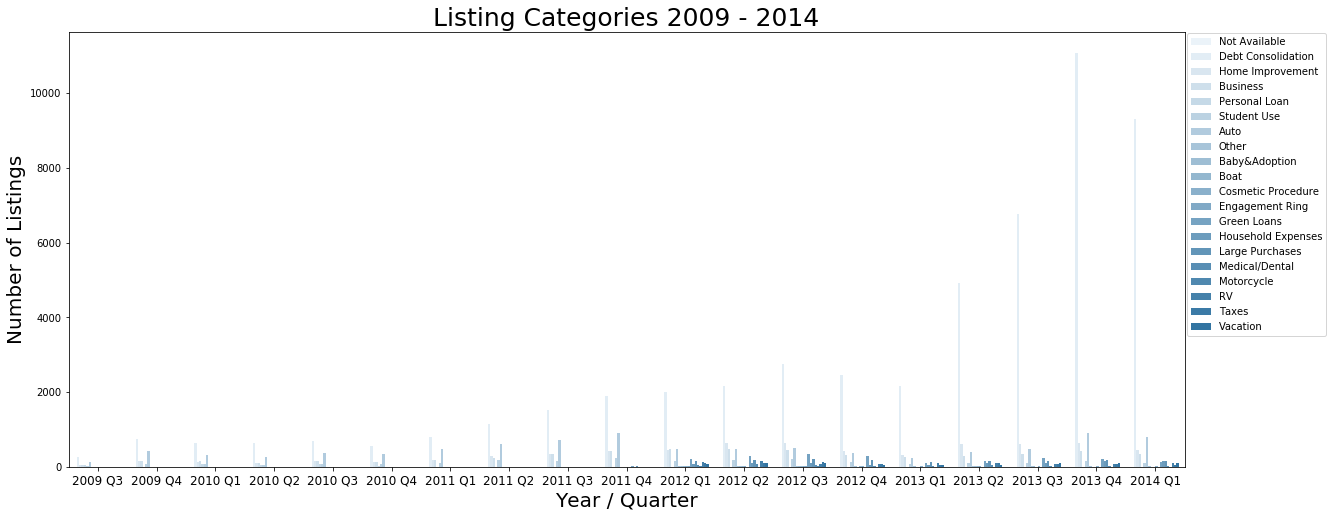

In [33]:
plt.figure(figsize = [20, 8]);
plot_loan_catgeories_over_time(df_loan_2009, 
                               listing_categories, 
                               loan_org_quarter_categories,
                              'Listing Categories 2009 - 2014');

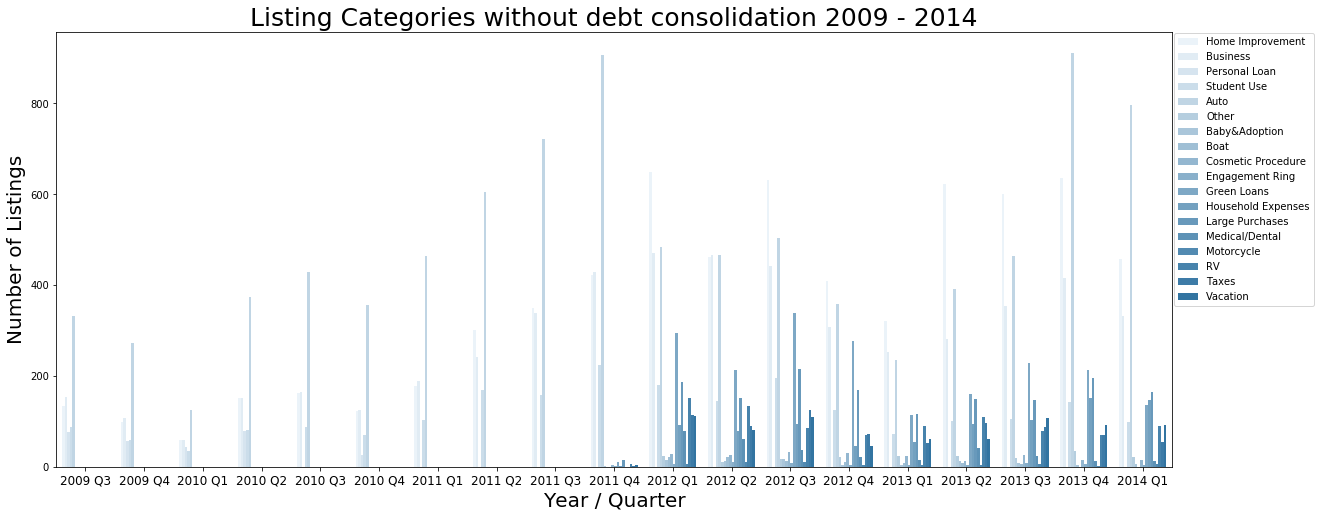

In [34]:
plt.figure(figsize = [20, 8]);
plot_loan_catgeories_over_time(df_loan_without_debt_2009, 
                               listing_categories_without_debt, 
                               loan_org_quarter_categories,
                              'Listing Categories without debt consolidation 2009 - 2014');

In [35]:
def plot_loan_amounts(df_data, xticklabels, title):
    plt.figure(figsize = [30, 8]);
    cp = sb.boxplot(data=df_data, 
               x='ListingCategory (numeric)', 
               y='LoanOriginalAmount',
               palette=sb.color_palette("Blues", 20));

    cp.set_xticklabels(xticklabels, fontsize=15);
    cp.set_xlabel('Loan Categories', fontsize=20);
    cp.set_ylabel('Amount of Loans in $', fontsize=20);
    cp.set_title(title, fontsize=25);
    plt.xticks(rotation=15);
   

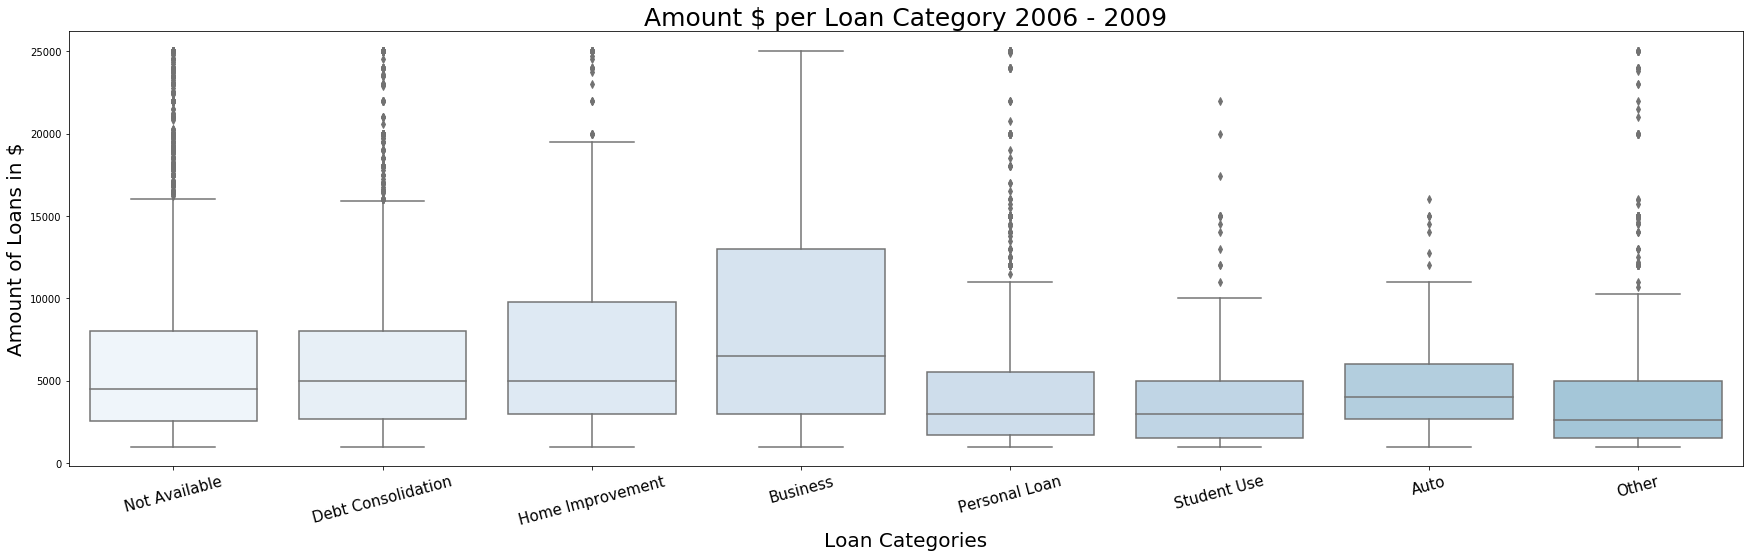

In [36]:
 plot_loan_amounts(df_loan_2006,
                 listing_categories,
                 'Amount $ per Loan Category 2006 - 2009')

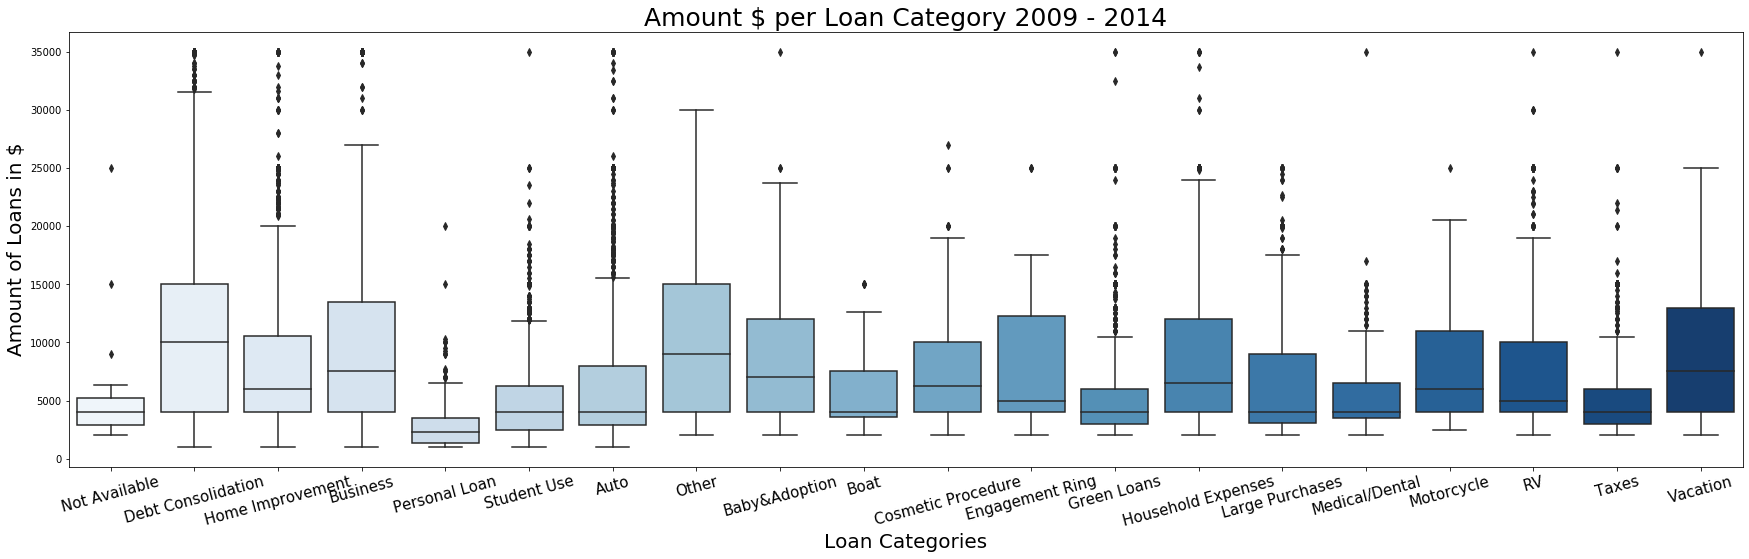

In [37]:
plot_loan_amounts(df_loan_2009,
                 listing_categories,
                 'Amount $ per Loan Category 2009 - 2014')

In [38]:
def get_mean(df_data):
    mean_per_category = df_data.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()
    df_mean_per_category = mean_per_category.to_frame()
    df_mean_per_category = df_mean_per_category.reset_index()
    return df_mean_per_category

In [39]:
def get_sum(df_data):
    sum_per_category = df_data.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].sum()
    df_sum_per_category = sum_per_category.to_frame()
    df_sum_per_category = df_sum_per_category.reset_index()
    return df_sum_per_category

In [40]:
def plot_amount(df_data, xticklabels, title, ylabel):
    plt.figure(figsize = [30, 8]);
    lp = sb.barplot(data=df_data, 
                x='ListingCategory (numeric)', 
                y='LoanOriginalAmount',
                palette=sb.color_palette("Blues", 20))
    lp.set_xticklabels(xticklabels, fontsize=15);
    plt.xticks(rotation=60);
    plt.xlabel('Listing Categories', fontsize=20);
    plt.ylabel(ylabel, fontsize=20);
    lp.set_title(title, fontsize=25);
   

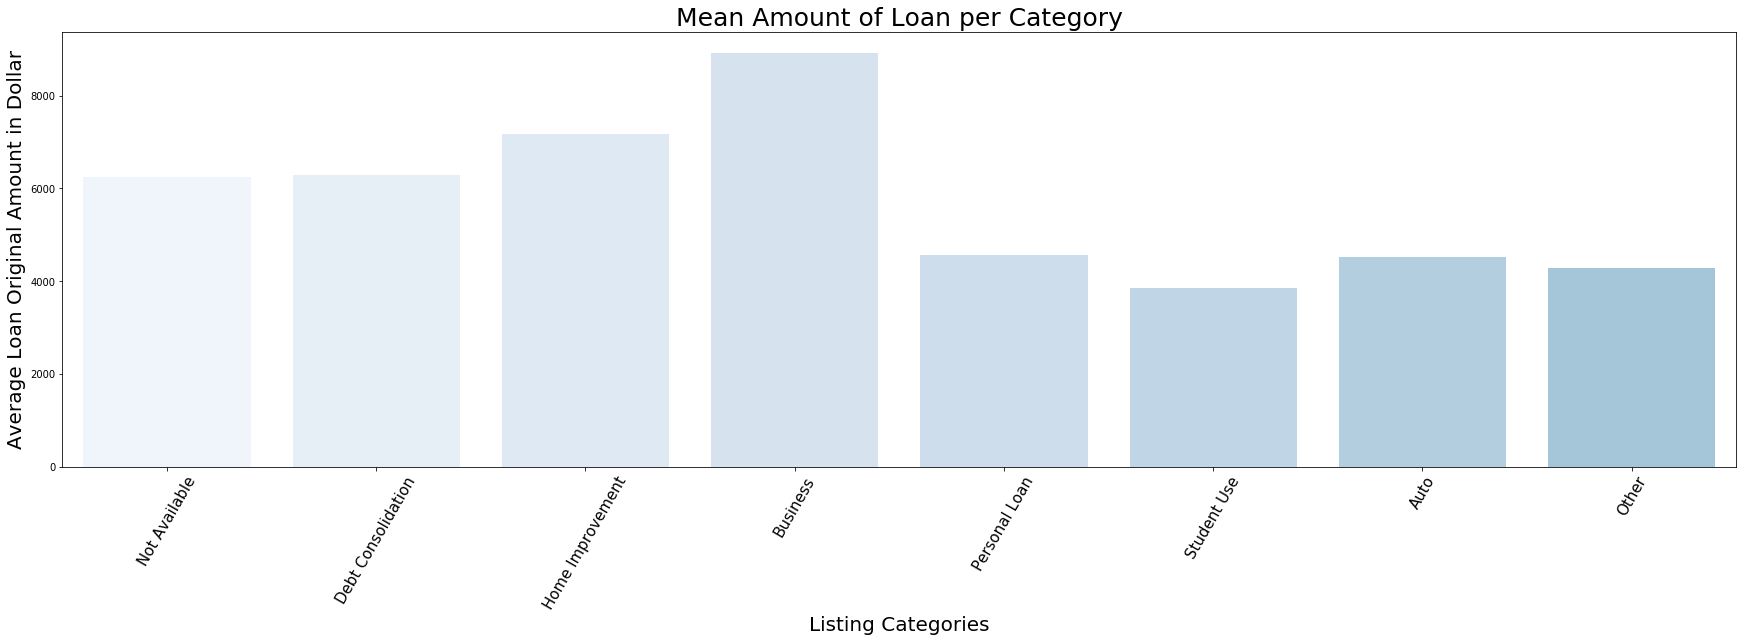

In [41]:
 plot_amount(get_mean(df_loan_2006), 
            listing_categories, 
            'Mean Amount of Loan per Category',
            'Average Loan Original Amount in Dollar')

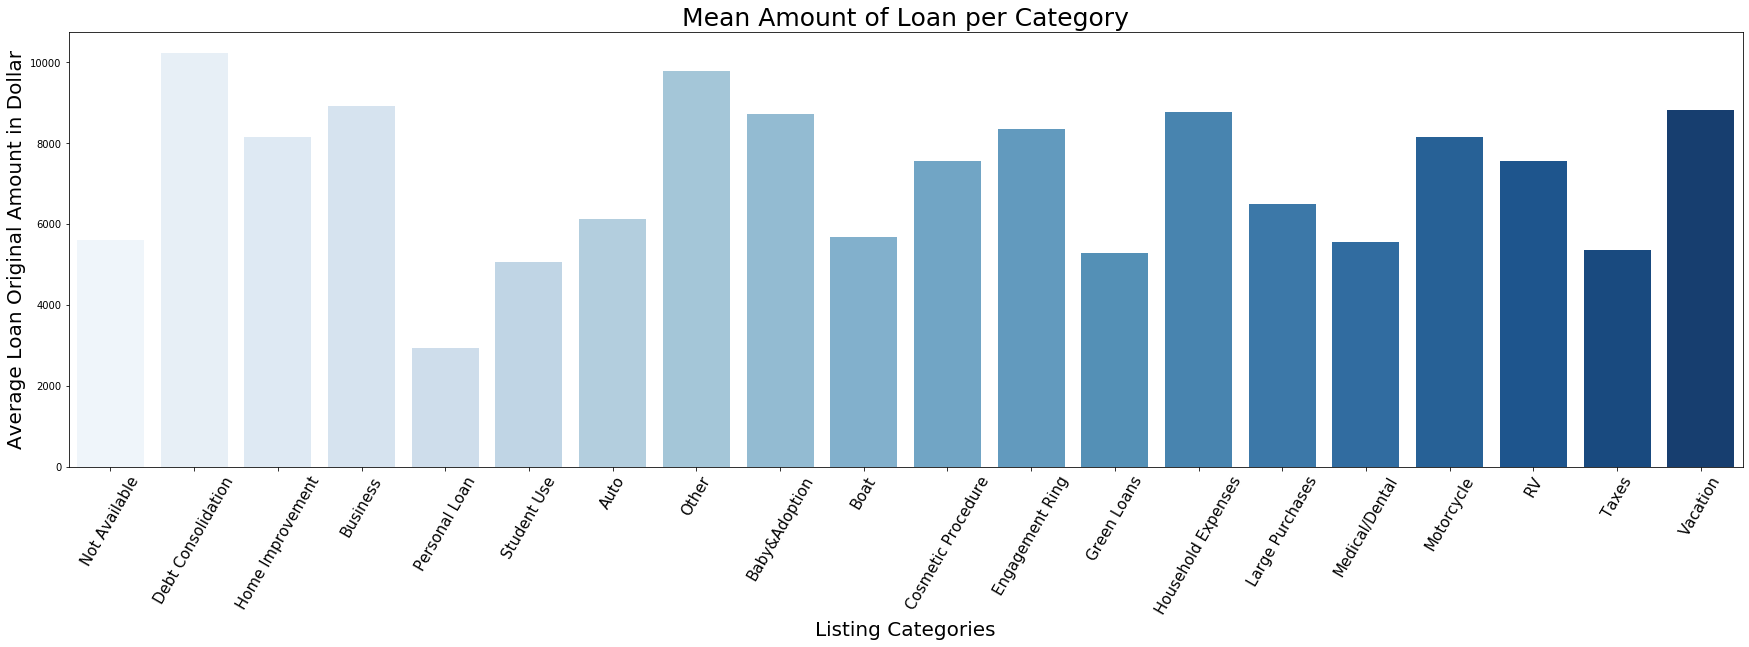

In [42]:
plot_amount(get_mean(df_loan_2009), 
            listing_categories, 
            'Mean Amount of Loan per Category',
            'Average Loan Original Amount in Dollar')

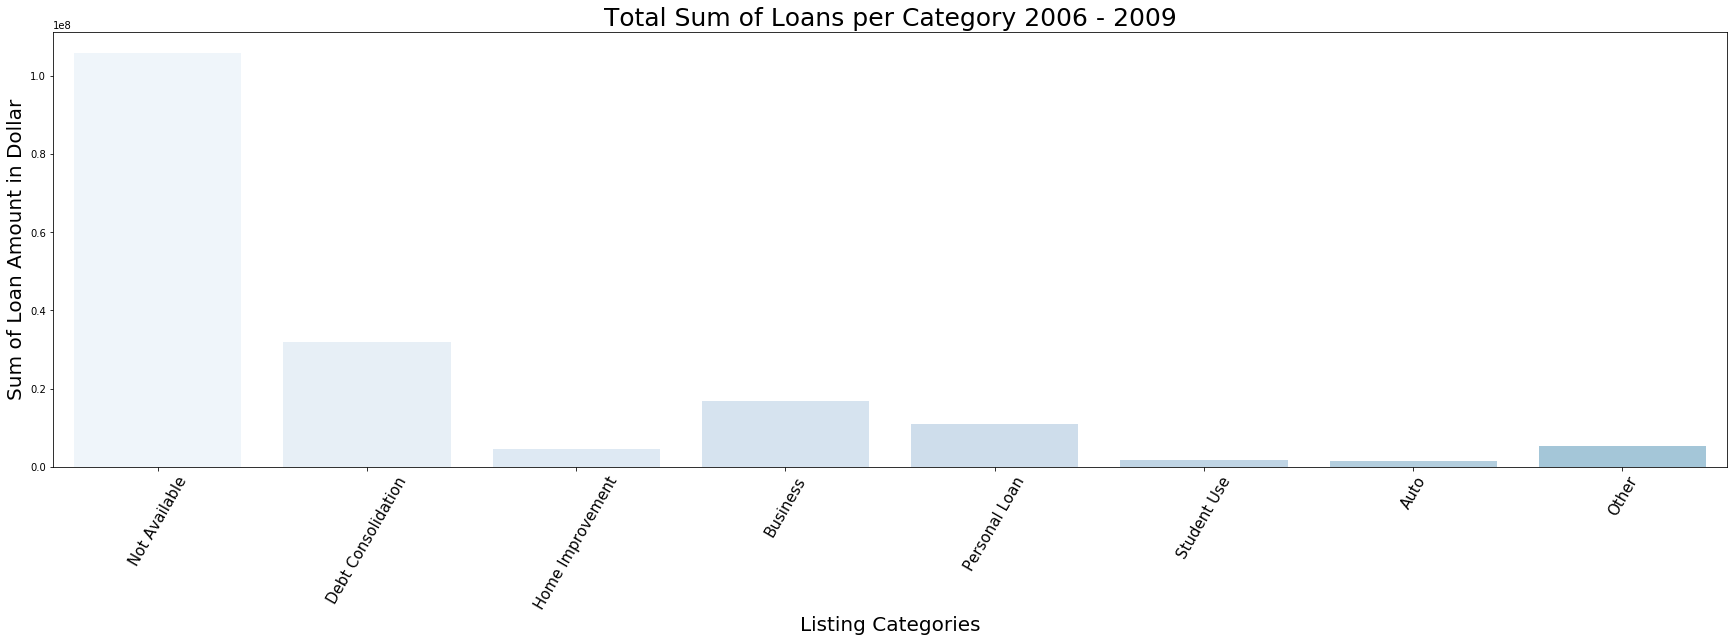

In [43]:
plot_amount(get_sum(df_loan_2006), 
            listing_categories, 
            'Total Sum of Loans per Category 2006 - 2009',
            'Sum of Loan Amount in Dollar')

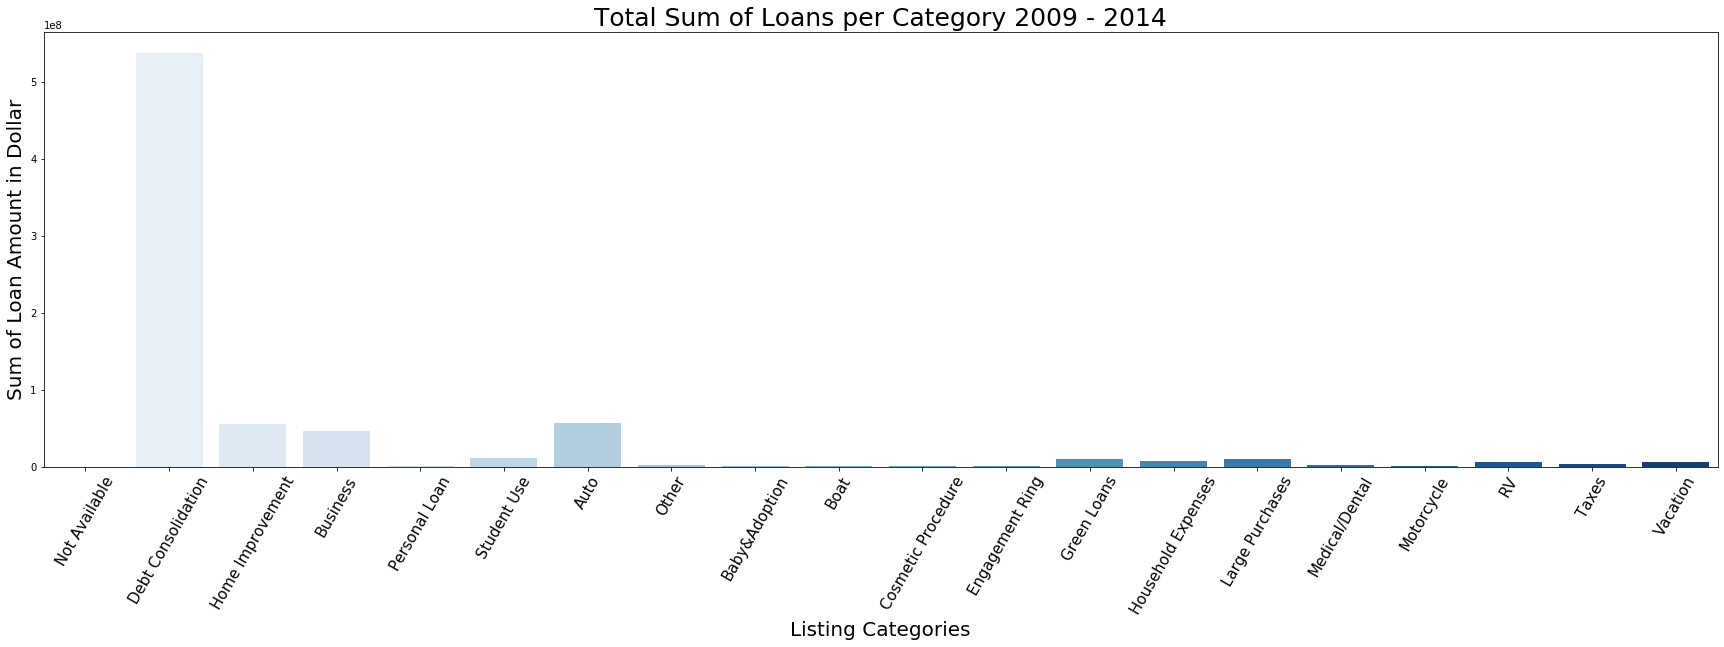

In [44]:
plot_amount(get_sum(df_loan_2009), 
            listing_categories, 
            'Total Sum of Loans per Category 2009 - 2014',
            'Sum of Loan Amount in Dollar')

In [45]:
def plot_outcomes(df_data, xticklabels, title):
    plt.figure(figsize = [30, 8]);
    cp = sb.countplot(data=df_data, 
                      x='ListingCategory (numeric)', 
                      hue='Loan Outcome', 
                      palette=sb.color_palette("RdYlBu", 2)
                     );
    cp.set_xticklabels(xticklabels, fontsize=15);
    cp.set_yticklabels([2000, 4000, 6000, 8000, 10000], fontsize=15)
    plt.xticks(rotation=60);
    plt.legend(fontsize=20)
    cp.set_xlabel('Loan Categories', fontsize=20);
    cp.set_ylabel('Number of Listings', fontsize=20);
    cp.set_title(title, fontsize=25);
    

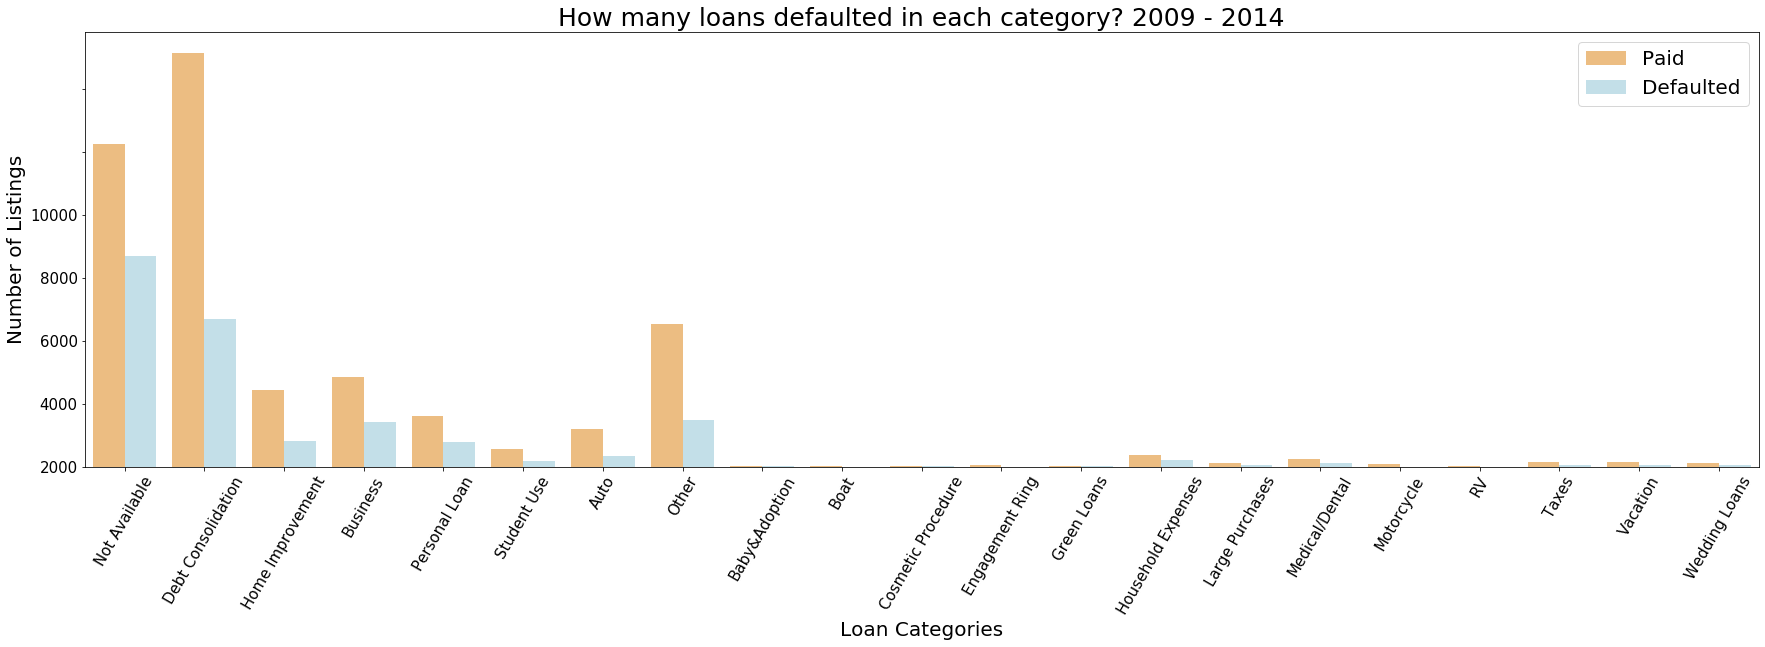

In [46]:
plot_outcomes(df_loan_with_outcome, 
              listing_categories,
             'How many loans defaulted in each category? 2009 - 2014')

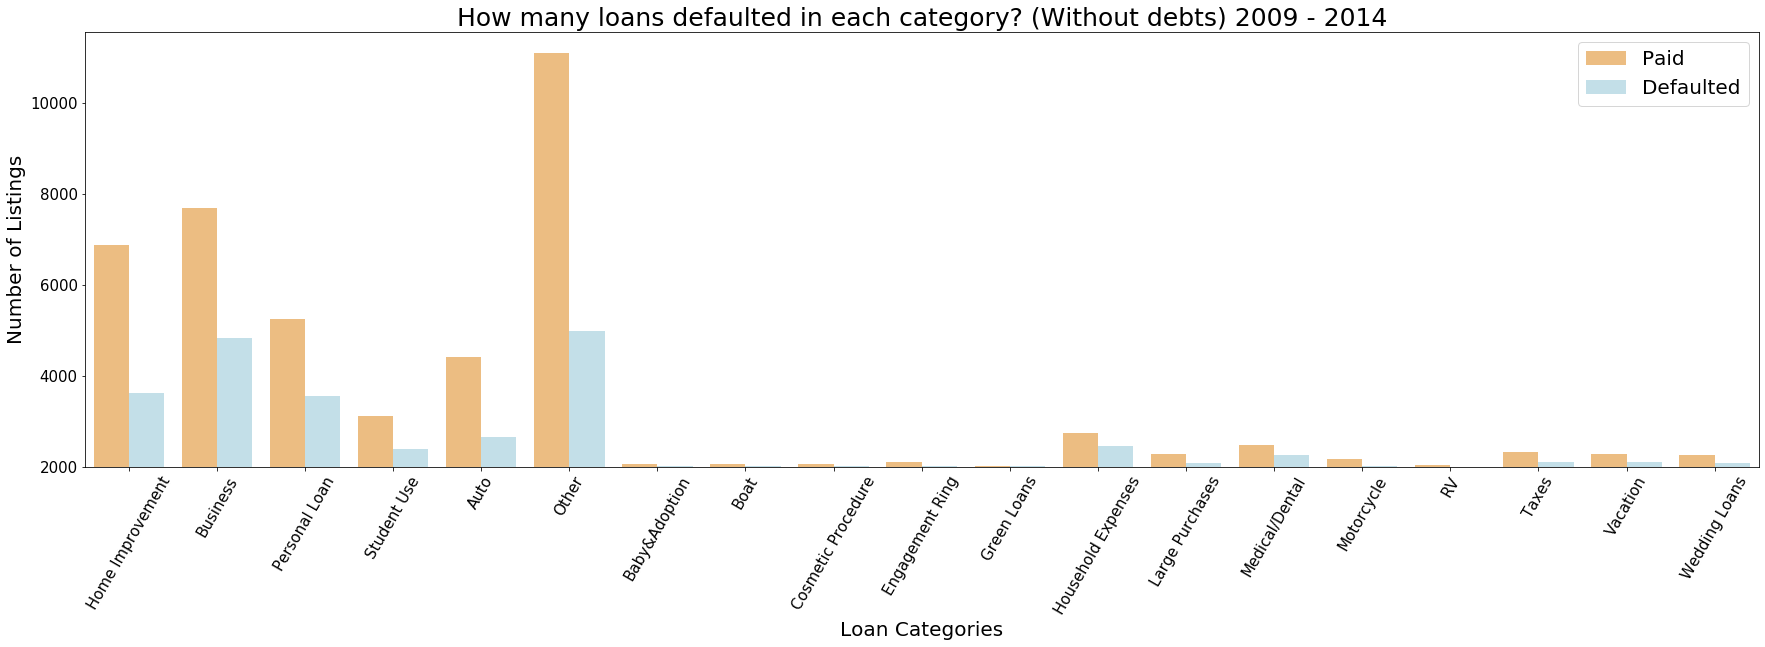

In [47]:
df_loan_with_outcome_without_debt = df_loan_with_outcome[df_loan_with_outcome['ListingCategory (numeric)'] >1]

plot_outcomes(df_loan_with_outcome_without_debt, 
              listing_categories_without_debt,
             'How many loans defaulted in each category? (Without debts) 2009 - 2014')

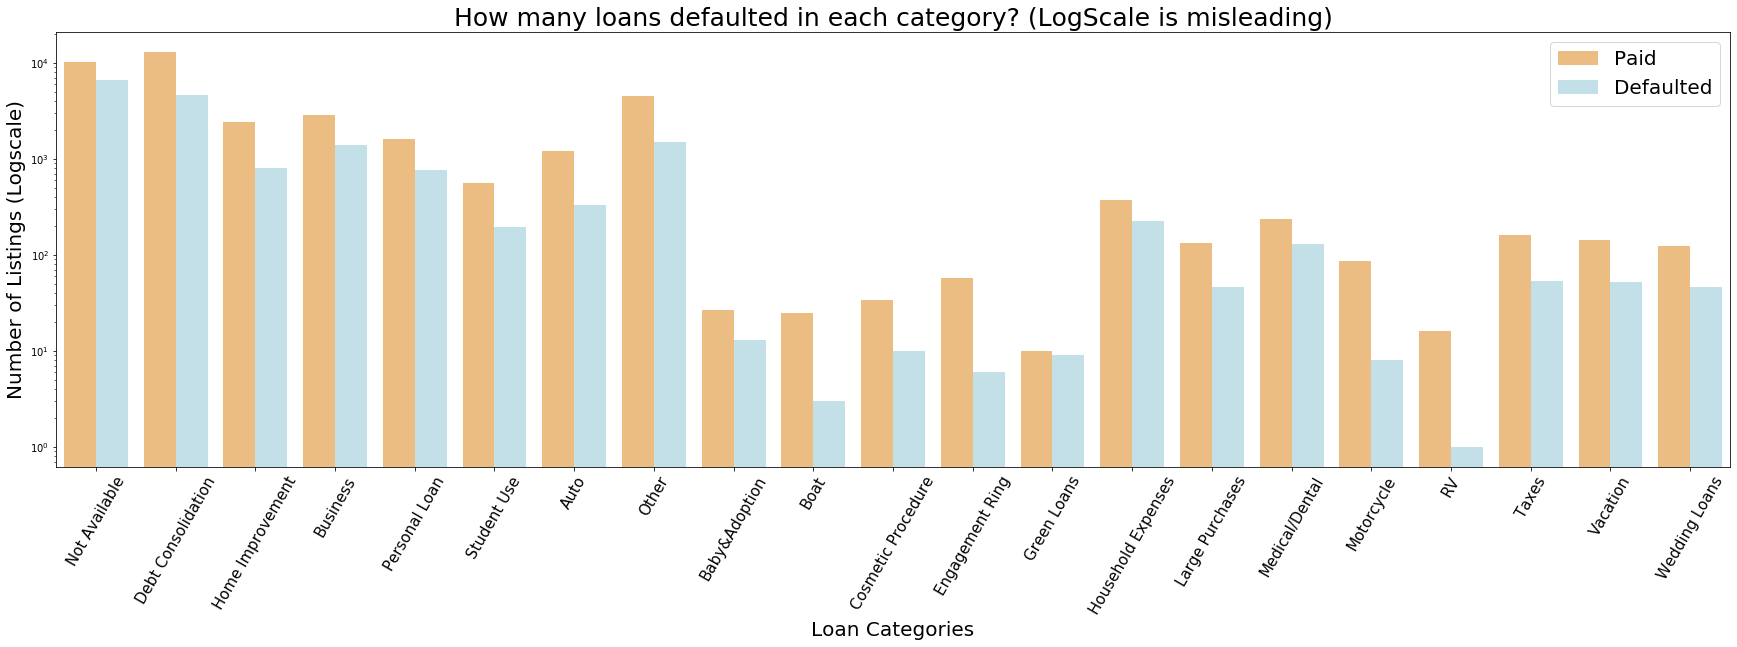

In [48]:
plt.figure(figsize = [30, 8]);
cp = sb.countplot(data=df_loan_with_outcome, 
                  x='ListingCategory (numeric)', 
                  hue='Loan Outcome', 
                  palette=sb.color_palette("RdYlBu", 2));
cp.set_yscale('log');
#cp.set_yticklabels([500, 1000, 5000, 10000, 50000]);
cp.set_xticklabels(listing_categories, fontsize=15);
plt.xticks(rotation=60);
plt.legend(fontsize=20)
cp.set_xlabel('Loan Categories', fontsize=20)
cp.set_ylabel('Number of Listings (Logscale)', fontsize=20)
cp.set_title('How many loans defaulted in each category? (LogScale is misleading)', fontsize=25);

In [49]:
df_loan_with_outcome_categ = df_loan_with_outcome[(df_loan_with_outcome['ListingCategory (numeric)']<7) & (df_loan_with_outcome['ListingCategory (numeric)']>0)]

df_state_cat_rate = df_loan_with_outcome_categ.groupby(['BorrowerState', 'ListingCategory (numeric)', 'Loan Outcome']).size().unstack('Loan Outcome')
df_state_cat_rate = df_state_cat_rate.fillna(0)
df_state_cat_rate.loc['NY']
df_state_cat_rate

Loan Outcome,Defaulted,Paid
ListingCategory (numeric),,
1,219.0,793.0
2,45.0,138.0
3,58.0,143.0
4,23.0,79.0
5,8.0,34.0
6,19.0,54.0


Loan Outcome                             Defaulted  Paid
BorrowerState ListingCategory (numeric)                 
AK            1                                5.0  23.0
              2                                2.0  11.0
              3                                2.0   7.0
              4                                2.0   5.0
              5                                0.0   2.0
...                                            ...   ...
WY            2                                0.0   4.0
              3                                1.0   2.0
              4                                1.0   4.0
              5                                0.0   1.0
              6                                0.0   3.0

[299 rows x 2 columns]

In [50]:
df_state_cat_rate['TotalCount'] = df_state_cat_rate['Defaulted'] + df_state_cat_rate['Paid']
#default_rate = default * 100 / (default+paid)
df_state_cat_rate['DefaultRate'] = round(df_state_cat_rate['Defaulted'] * 100 / (df_state_cat_rate['Paid'] + df_state_cat_rate['Defaulted']))

print('Main categories ordered ascending by default rate per state (with at least 10 loans in the category):')
df_cat_per_state = df_state_cat_rate[df_state_cat_rate['TotalCount']>10]
df_cat_per_state.sort_values('DefaultRate').head(10)

print('Main categories ordered descending by default rate per state (with at least 10 loans in the category):')
df_cat_per_state.sort_values('DefaultRate', ascending=False).head(10)

print('Default rate per state for category Debt Consolidation:')
df_debts_per_state = df_state_cat_rate[df_state_cat_rate.index.get_level_values('ListingCategory (numeric)').isin([1])]
df_debts_per_state.sort_values('DefaultRate').head(10)

Main categories ordered ascending by default rate per state (with at least 10 loans in the category):


,Loan Outcome,Defaulted,Paid,TotalCount,DefaultRate
BorrowerState,ListingCategory (numeric),,,,
NH,2,0.0,21.0,21.0,0.0
TX,4,0.0,18.0,18.0,0.0
UT,5,0.0,12.0,12.0,0.0
NM,3,1.0,18.0,19.0,5.0
UT,6,1.0,13.0,14.0,7.0
NE,3,1.0,12.0,13.0,8.0
NV,6,1.0,11.0,12.0,8.0
NE,4,1.0,10.0,11.0,9.0
DC,2,1.0,10.0,11.0,9.0


Main categories ordered descending by default rate per state (with at least 10 loans in the category):


,Loan Outcome,Defaulted,Paid,TotalCount,DefaultRate
BorrowerState,ListingCategory (numeric),,,,
LA,6,8.0,6.0,14.0,57.0
NH,3,6.0,5.0,11.0,55.0
KY,3,15.0,15.0,30.0,50.0
AR,4,9.0,9.0,18.0,50.0
AL,5,8.0,8.0,16.0,50.0
MD,3,51.0,55.0,106.0,48.0
AL,3,20.0,22.0,42.0,48.0
ME,1,15.0,17.0,32.0,47.0
ID,2,7.0,8.0,15.0,47.0


Default rate per state for category Debt Consolidation:


,Loan Outcome,Defaulted,Paid,TotalCount,DefaultRate
BorrowerState,ListingCategory (numeric),,,,
DC,1,14.0,79.0,93.0,15.0
WY,1,3.0,16.0,19.0,16.0
AK,1,5.0,23.0,28.0,18.0
CO,1,75.0,310.0,385.0,19.0
MT,1,11.0,43.0,54.0,20.0
TX,1,156.0,596.0,752.0,21.0
MA,1,81.0,304.0,385.0,21.0
WV,1,14.0,50.0,64.0,22.0
UT,1,34.0,124.0,158.0,22.0


In [51]:
ordered_categories = df_loan_with_outcome_categ['ListingCategory (numeric)'].value_counts().index
ordered_categories

ordered_states = df_loan_with_outcome_categ['BorrowerState'].value_counts().index
ordered_states

Int64Index([1, 3, 2, 4, 6, 5], dtype='int64')

Index(['CA', 'FL', 'IL', 'NY', 'GA', 'TX', 'OH', 'VA', 'MI', 'WA', 'NC', 'MO',
       'PA', 'MD', 'MN', 'NJ', 'CO', 'IN', 'MA', 'OR', 'AZ', 'WI', 'TN', 'AL',
       'CT', 'UT', 'SC', 'OK', 'KS', 'KY', 'NV', 'ID', 'LA', 'MS', 'AR', 'NE',
       'NH', 'DC', 'NM', 'RI', 'WV', 'HI', 'MT', 'IA', 'DE', 'AK', 'ME', 'VT',
       'SD', 'WY', 'ND'],
      dtype='object')

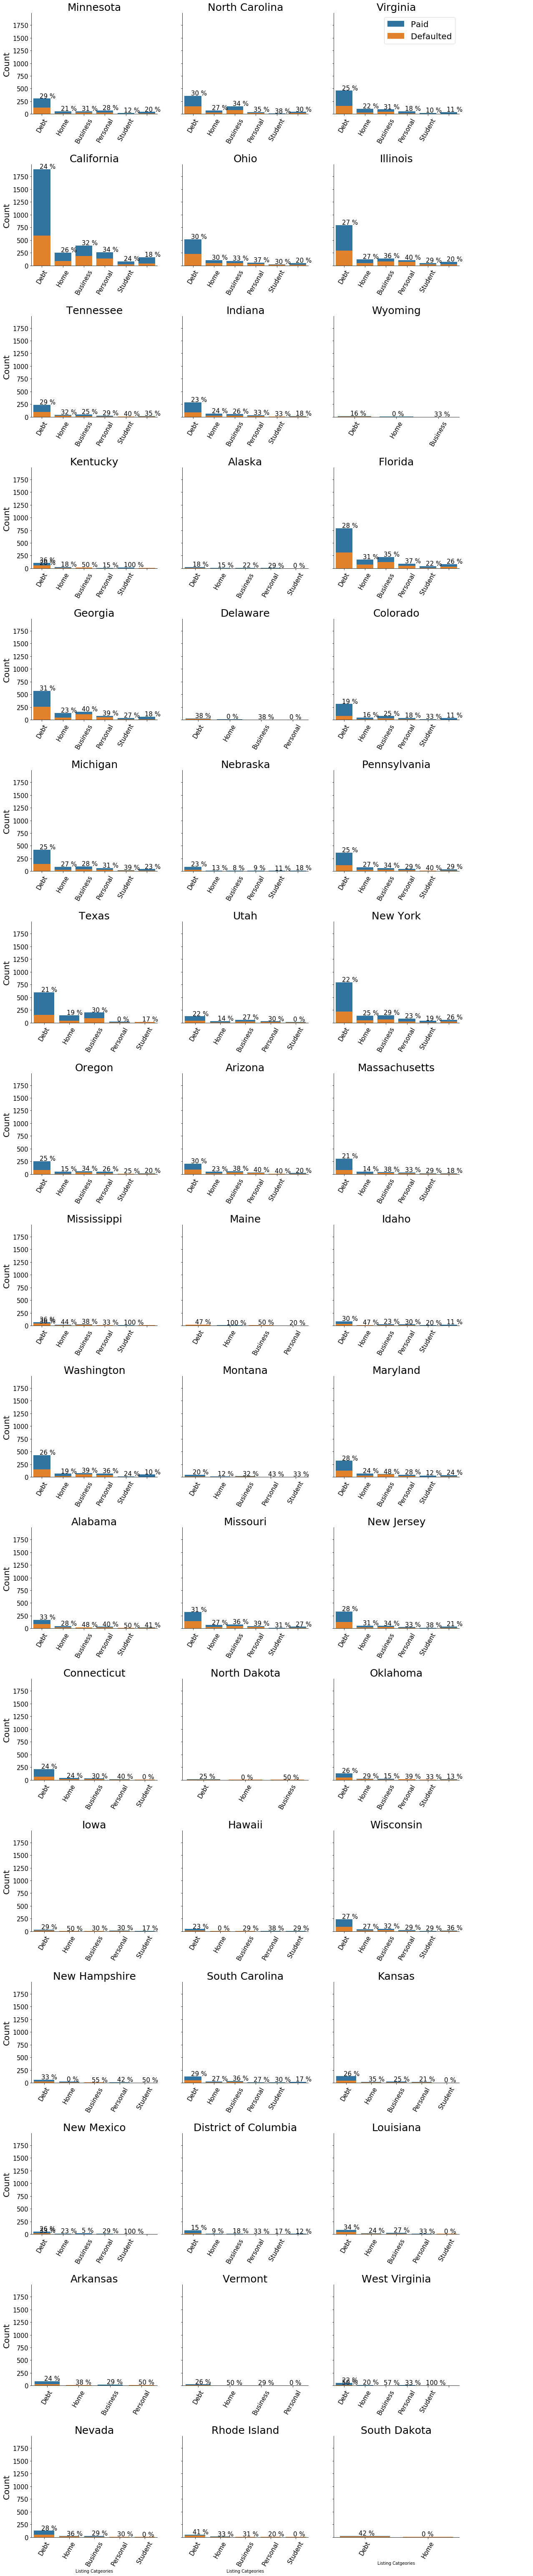

In [52]:
from IPython.utils import io
with io.capture_output() as captured:
    grid = sb.FacetGrid(data=df_loan_with_outcome_categ, 
                     col="BorrowerState", 
                     hue="Loan Outcome", 
                     col_wrap=3,
                     height=5,
                     #aspect =1,
                     sharex=False,
                     sharey=True,
                     legend_out=True,
                     row_order=ordered_states
                    );
    cp = grid.map(sb.countplot, 'ListingCategory (numeric)');
    grid.set_xlabels('Listing Catgeories', fontsize=10);
    grid.set_ylabels('Count', fontsize=20);
    grid.set_xticklabels(listing_categories_short, rotation= 60, fontsize=15);
    grid.set_yticklabels(fontsize=15);
    grid.fig.subplots_adjust(hspace=0.5, wspace=0.2);
    axes = grid.axes.flatten();
    grid.axes[2].legend(fontsize=20);


    for ind, axe in enumerate(axes, start=0):
        state = axe.title.get_text()[16:];
        axe.set_title(states[state], fontsize=25);
        print('len(axe.patches) is: ', len(axe.patches))
        index=0
        print('index is: ', index)
        for aind, p in enumerate(axe.patches, start=0): 
            print('aind is: ', aind)
            print('p.get_y() is: ', p.get_y())
            print('p.get_height() is: ', p.get_height())
            x = p.get_x() + p.get_width()/2-0.1;
            y = p.get_y() + p.get_height() + 15.0;
            percentage = index
            try:
                result = df_state_cat_rate.loc[state, (index+1)]
                print('result is: ', result)
                percentage = str(int(result['DefaultRate'])) + ' %';
            except TypeError as e:
                percentage = '0 %'
            print('percentage is: ', percentage)
            axe.annotate(percentage, (x, y), fontsize=15);
            index += 1
            if (index >= len(axe.patches)/2):
                break

<a id='borrower_details'></a>
## Borrowers Details

### Observations:

    - To the 83.982 listed loans in the investigated dataset 68989 borrowers are associated.
    - not all borrowers have a prosper score -> before 2009 CreditGrade was used
    - Most borrowers have good to medium prosper ratings (A to D). If we consider to more fine granulare prosper score we find 3 peaks for the upper border, the lower border and the perfect middle of the scores.
    - there are borrowers with monthly income of 1 750 000, what are they doing on such a platform? 
    - what about borrowers with zero income? do they have any chance to get a loan? why?
    - what about borrowers with 755 months employment (62 years), this seems to be wrong
    - maximum numbers of loans taken is 9
    - the debt to income ratio is capped at 1001% - this means the borrower pay more for their debt than they have income
    - 799 loans are given to borrowers which have 10 times more to pay for their loans than they have income
    - among these overindebted persons there are 102 with credit grades AA and A before 2009 and 13 with prosper scores AA and A after 2009 - first exploration plots show that highly indebted borrowers got much more often higher credit grades than after 2009
    - the income range distribution looks like a normal distribution

### Possible Questions:

    - for all borrowers which defaulted:
        - what is the debt income ratio / bank card credit / monthly income / occupation compared to borrowers which not defaulted?
    - how does monthly income of borrowers evolve over time?    
    

In [53]:
df_borrower_details = df_loan[['MemberKey',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'CreditGrade',
       'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'AvailableBankcardCredit',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'OpenRevolvingMonthlyPayment']].copy()
df_borrower_details.head(2)

,MemberKey,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,CreditGrade,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,OpenRevolvingMonthlyPayment
0,1F3E3376408759268057EDA,NaN,NaN,NaN,C,CO,Other,Self-employed,2.0,True,True,NaN,1500.0,0.17,"$25,000-49,999",True,3083.333333,24.0
1,1D13370546739025387B2F4,6.0,A,7.0,NaN,CO,Professional,Employed,44.0,False,False,NaN,10266.0,0.18,"$50,000-74,999",True,6125.000000,389.0


In [54]:
df_borrower_details['ProsperRating (numeric)'].unique()

array([nan,  6.,  3.,  5.,  2.,  4.,  7.,  1.])

In [55]:
df_borrower_details['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [56]:
df_borrower_details['ProsperScore'].unique()

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [57]:
print('Description of borrowers details data set:')
df_borrower_details.describe()

Description of borrowers details data set:


,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,OpenRevolvingMonthlyPayment
count,84853.000000,84853.000000,106312.000000,106393.000000,105383.000000,1.139370e+05,113937.000000
mean,4.072243,5.950067,96.071582,11210.225447,0.275947,5.608026e+03,398.292161
std,1.673227,2.376501,94.480605,19818.361309,0.551759,7.478497e+03,447.159711
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,4.000000,26.000000,880.000000,0.140000,3.200333e+03,114.000000
50%,4.000000,6.000000,67.000000,4100.000000,0.220000,4.666667e+03,271.000000
75%,5.000000,8.000000,137.000000,13180.000000,0.320000,6.825000e+03,525.000000
max,7.000000,11.000000,755.000000,646285.000000,10.010000,1.750003e+06,14985.000000


In [58]:
print('Borrowers without occupation: ', df_borrower_details[df_borrower_details['Occupation'].isnull()].shape[0])
df_borrower_details['Occupation'] = df_borrower_details['Occupation'].fillna('Not availabe')
print('Borrowers set to Not available: ', df_borrower_details[df_borrower_details['Occupation']=='Not availabe'].shape[0])
list_ocupation = df_borrower_details['Occupation'].unique()
np.sort(list_ocupation)

Borrowers without occupation:  3588
Borrowers set to Not available:  3588


array(['Accountant/CPA', 'Administrative Assistant', 'Analyst',
       'Architect', 'Attorney', 'Biologist', 'Bus Driver', 'Car Dealer',
       'Chemist', 'Civil Service', 'Clergy', 'Clerical',
       'Computer Programmer', 'Construction', 'Dentist', 'Doctor',
       'Engineer - Chemical', 'Engineer - Electrical',
       'Engineer - Mechanical', 'Executive', 'Fireman',
       'Flight Attendant', 'Food Service', 'Food Service Management',
       'Homemaker', 'Investor', 'Judge', 'Laborer', 'Landscaping',
       'Medical Technician', 'Military Enlisted', 'Military Officer',
       'Not availabe', 'Nurse (LPN)', 'Nurse (RN)', "Nurse's Aide",
       'Other', 'Pharmacist', 'Pilot - Private/Commercial',
       'Police Officer/Correction Officer', 'Postal Service', 'Principal',
       'Professional', 'Professor', 'Psychologist', 'Realtor',
       'Religious', 'Retail Management', 'Sales - Commission',
       'Sales - Retail', 'Scientist', 'Skilled Labor', 'Social Worker',
       'Student - Co

In [59]:
df_borrower_details.groupby('Occupation').size()

Occupation
Accountant/CPA                         3233
Administrative Assistant               3688
Analyst                                3602
Architect                               213
Attorney                               1046
Biologist                               125
Bus Driver                              316
Car Dealer                              180
Chemist                                 145
Civil Service                          1457
Clergy                                  196
Clerical                               3164
Computer Programmer                    4478
Construction                           1790
Dentist                                  68
Doctor                                  494
Engineer - Chemical                     225
Engineer - Electrical                  1125
Engineer - Mechanical                  1406
Executive                              4311
Fireman                                 422
Flight Attendant                        123
Food Service         

In [60]:
df_loan.groupby('MemberKey').size().sort_values()

MemberKey
00003397697413387CAF966    1
A26C36992199631757E560E    1
A26B358384257780981FEC2    1
A26B33650868107975E8DDE    1
A26A3585676861896397570    1
                          ..
4D9C3403302047712AD0CDD    8
C70934206057523078260C7    8
7E1733653050264822FAA3D    8
16083364744933457E57FB9    8
63CA34120866140639431C9    9
Length: 90831, dtype: int64

In [61]:
df_employment_distribution = df_loan.groupby('EmploymentStatus').size()
df_employment_distribution

EmploymentStatus
Employed         67322
Full-time        26355
Not available     5347
Not employed       835
Other             3806
Part-time         1088
Retired            795
Self-employed     6134
dtype: int64

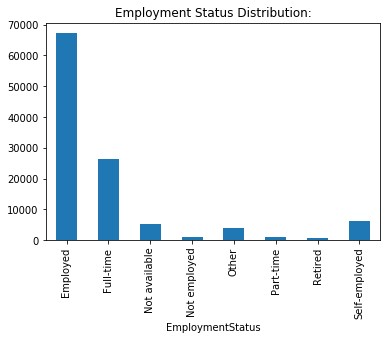

In [62]:
df_employment_distribution.plot(kind='bar',
                               title='Employment Status Distribution:');

In [63]:
df_indebted_borrowers = df_borrower_details[df_borrower_details['DebtToIncomeRatio']>1.0].sort_values('DebtToIncomeRatio', ascending=False)
print('Borrowers which pay more for debts than they have income: ', df_indebted_borrowers.shape[0])

print('Indebted borrowers with prosper ratings (after 2009): ', df_indebted_borrowers[df_indebted_borrowers['ProsperRating (Alpha)'].notnull()].shape[0])
df_indebted_distribution_scores = df_indebted_borrowers.groupby('ProsperRating (Alpha)').size()
df_indebted_distribution_scores.to_csv('data/indebted_distribution_scores.csv', header=True)
df_indebted_distribution_scores

print('Indebted borrowers with credit grades (before 2009)', df_indebted_borrowers[df_indebted_borrowers['CreditGrade'].notnull()].shape[0])
df_indebted_distribution_grades = df_indebted_borrowers.groupby('CreditGrade').size()
df_indebted_distribution_grades.to_csv('data/indebted_distribution_grades.csv', header=True)
df_indebted_distribution_grades

Borrowers which pay more for debts than they have income:  799
Indebted borrowers with prosper ratings (after 2009):  323


ProsperRating (Alpha)
A       8
AA      5
B      21
C      29
D      58
E      72
HR    130
dtype: int64

Indebted borrowers with credit grades (before 2009) 475


CreditGrade
A      53
AA     49
B      94
C     100
D      86
E      42
HR     50
NC      1
dtype: int64

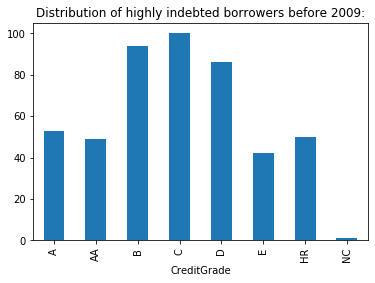

In [64]:
df_indebted_distribution_grades.plot(kind='bar',
                                    title='Distribution of highly indebted borrowers before 2009:');

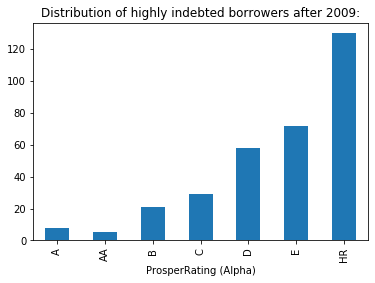

In [65]:
df_indebted_distribution_scores.plot(kind='bar',
                                    title='Distribution of highly indebted borrowers after 2009:');

In [66]:
high_score_mask = (df_borrower_details['CreditGrade']=='AA') | (df_borrower_details['CreditGrade']=='A')
df_high_score_borrowers = df_borrower_details[high_score_mask].copy()
df_high_score_borrowers['DebtToIncomeRatioRounded'] = df_high_score_borrowers['DebtToIncomeRatio'].apply(lambda x: np.round(x,2))

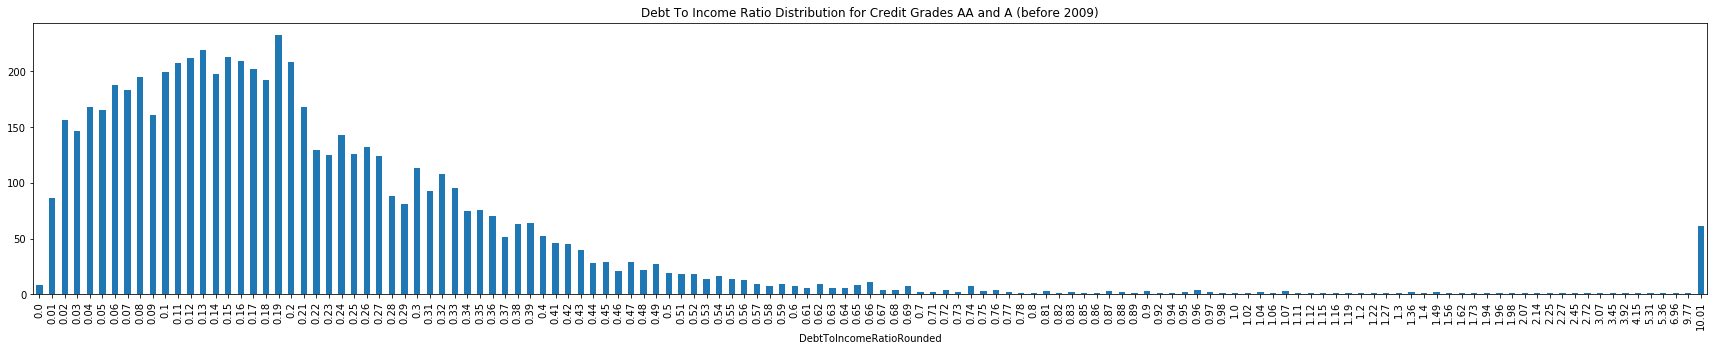

In [67]:
df_high_score_distribution = df_high_score_borrowers.groupby('DebtToIncomeRatioRounded').size()
df_high_score_distribution.plot(kind='bar', 
                                figsize=(30,5),
                                title='Debt To Income Ratio Distribution for Credit Grades AA and A (before 2009)');

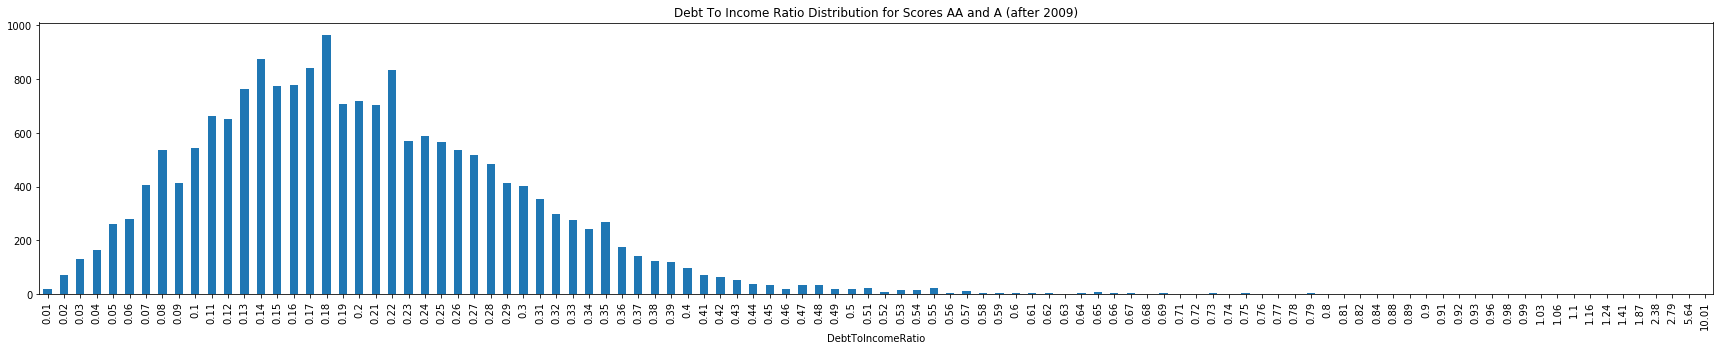

In [68]:
high_score_mask = (df_borrower_details['ProsperRating (Alpha)']=='AA') | (df_borrower_details['ProsperRating (Alpha)']=='A')
df_high_score_borrowers = df_borrower_details[high_score_mask]
df_high_score_distribution = df_high_score_borrowers.groupby('DebtToIncomeRatio').size()
df_high_score_distribution.plot(kind='bar', 
                                figsize=(30,5),
                               title='Debt To Income Ratio Distribution for Scores AA and A (after 2009)');

In [69]:
df_income_ranges = df_borrower_details.groupby('IncomeRange').size()
df_income_ranges

IncomeRange
$0                  621
$1-24,999          7274
$100,000+         17337
$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
Not displayed      7741
Not employed        806
dtype: int64

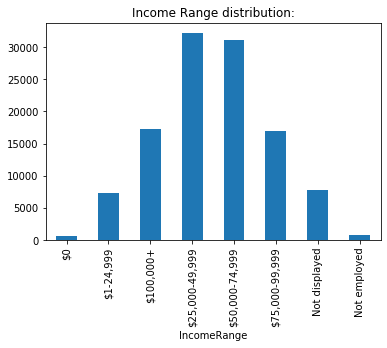

In [70]:
df_income_ranges.plot(kind='bar',
                     title='Income Range distribution:');

In [71]:
print('Number of borrowers:')
members = df_loan_clean.MemberKey.unique()
len(members), df_loan_clean.shape[0]

Number of borrowers:


(90831, 113066)

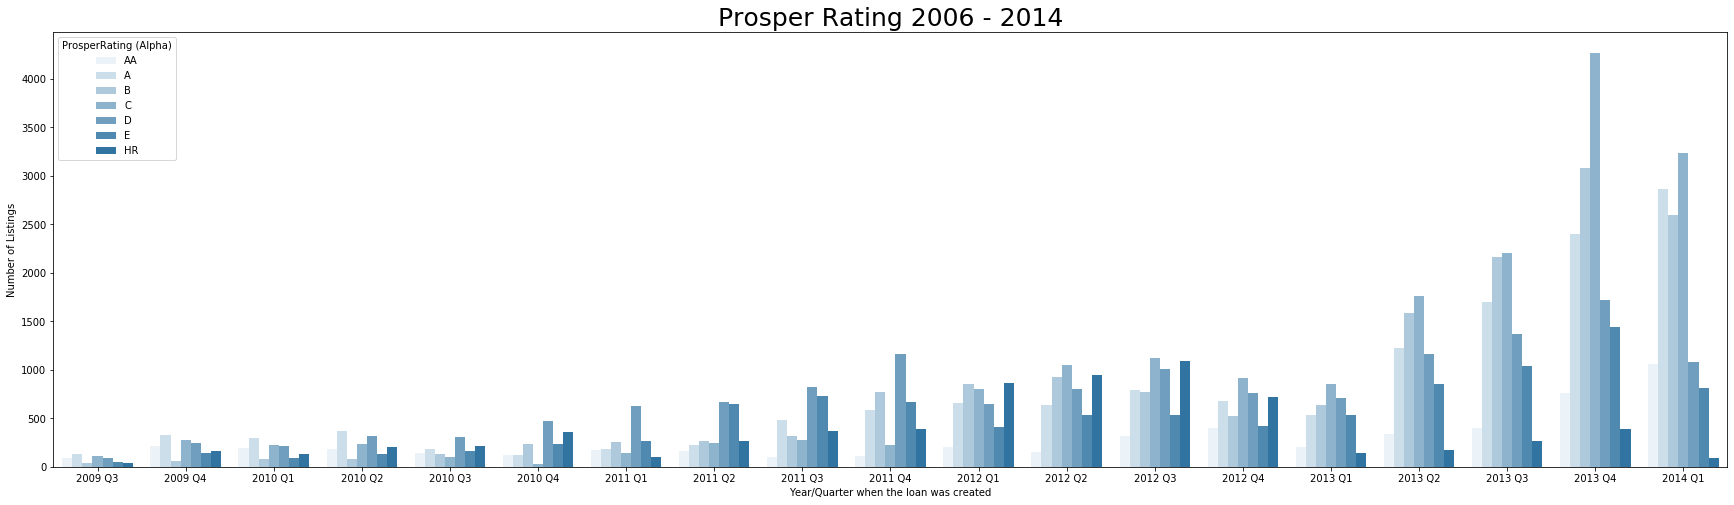

In [72]:
plt.figure(figsize=(30,8))
ax = sb.countplot(x="LoanOriginationQuarterNew", 
                  hue="ProsperRating (Alpha)", 
                  color=blue, 
                  data=df_loan_2009);
plt.xlabel('Year/Quarter when the loan was created');
plt.ylabel('Number of Listings');
plt.title('Prosper Rating 2006 - 2014', fontsize=25);


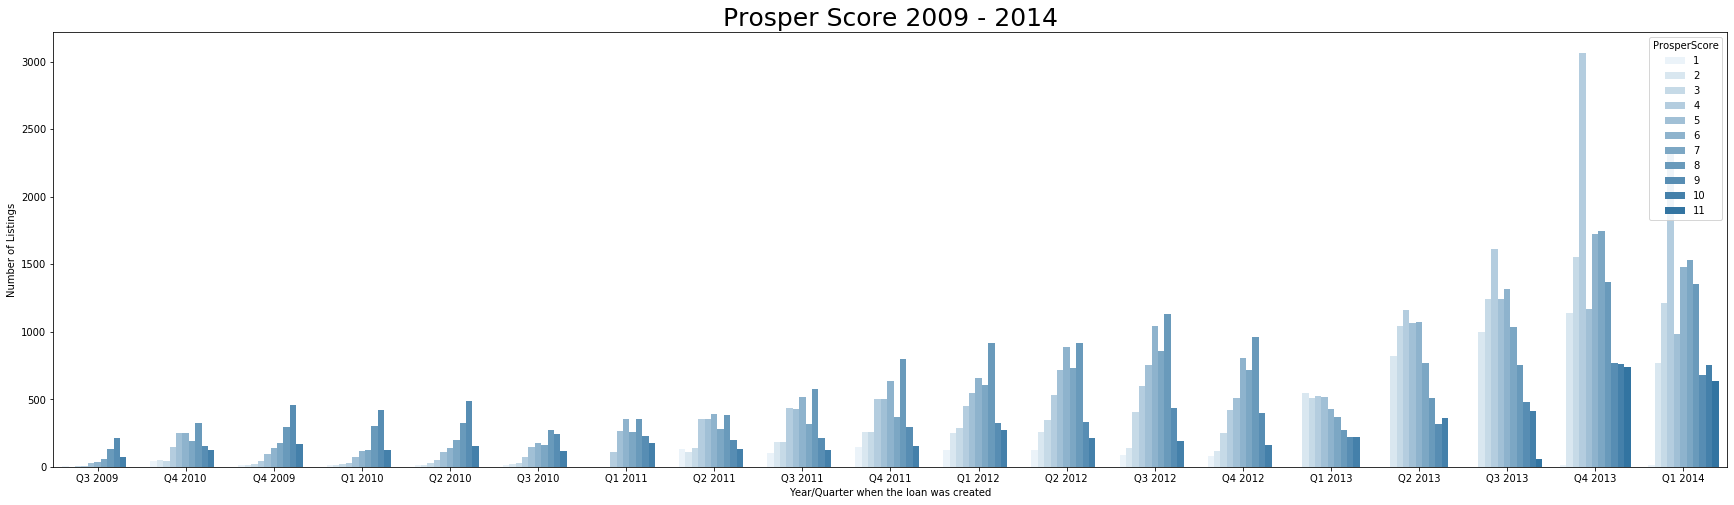

In [73]:
plt.figure(figsize = [30, 8]);
ax = sb.countplot(x="LoanOriginationQuarter", hue="ProsperScore", color=blue, 
                  data=df_loan_2009);
plt.xlabel('Year/Quarter when the loan was created');
plt.ylabel('Number of Listings');
plt.title('Prosper Score 2009 - 2014', fontsize=25);

####  Actions:
- ProsperRatings should be Categorical Types
- ProsperScore should be a Categorical Type but before converted to int
- LoanOriginationQuarter should be categorical and ordered
- to have consistent data we exclude all listing before Juli 2009

<a id='borrowers_history'></a>
## Borrowers history

### Observations:

    - borrowers hold up to 59 credit lines
    
### Possible Questions:
- total prosper loan
- bank card utilization
- revolving credit balance

What is the difference between credit lines and trades?

In [74]:
df_borrower_history = df_loan[['DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 
       'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',	    
       'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing']].copy()
df_borrower_history.head(10)

,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing
0,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,11.0,0.81,0.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,29.0,1.00,2.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,NaN,NaN,NaN,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,26.0,0.76,0.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,39.0,0.95,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN
5,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,47.0,1.00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-04-12 09:52:53,680.0,699.0,2000-09-29 00:00:00,10.0,7.0,20.0,6,16.0,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-05-05 06:49:25,700.0,719.0,1999-02-25 00:00:00,6.0,6.0,10.0,5,10.0,0.80,0.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,1260.0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,29.0,1.00,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,29.0,1.00,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
print('Description of borrowers history data set:')
df_borrower_history.describe()

Description of borrowers history data set:


,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing
count,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,106393.000000,106393.000000,106393.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000
mean,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,23.230034,0.885897,0.802327,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214
std,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,11.871311,0.148179,1.097637,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567
min,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000
25%,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,15.000000,0.820000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.310000,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000,0.000000,-35.000000
50%,680.000000,699.000000,10.000000,9.000000,25.000000,6.00000,22.000000,0.940000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.549000e+03,0.600000,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000,1626.550000,-3.000000
75%,720.000000,739.000000,13.000000,12.000000,35.000000,9.00000,30.000000,1.000000,1.000000,2.000000,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.952100e+04,0.840000,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000,4126.720000,25.000000
max,880.000000,899.000000,59.000000,54.000000,136.000000,51.00000,126.000000,1.000000,20.000000,105.000000,379.000000,83.000000,463881.000000,99.000000,38.000000,20.000000,1.435667e+06,5.950000,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000,23450.950000,286.000000
